In [7]:
import pandas as pd

In [ ]:
# tsv 파일 로드
chipo = pd.read_csv("../../csv/num_1/chipotle.tsv", sep="\t")
chipo

1. order_id 칼럼은 숫자의 의미를 가지지 않는 칼럼이기 때문에 문자형 변경
2. 가장 많이 주문한 item_name과 그 수량을 출력
3. item당 주문 총량을 구하고 바형 그래프로 시각화
4. item_price를 float 형태로 변환
5. 주문당 평균 계산 금액 출력
6. 각 아이템의 가격을 출력한 후에 가격 분포 그래프 / 가격 히스토그램 출력
7. 'Chicken Bowl'을 2개 이상 주문한 고객들의 'Chicken Bowl' 메뉴의 총 주문 수량 출력

In [ ]:
# order_id 컬럼의 데이터를 문자열로 변경
chipo['order_id'] = chipo['order_id'].astype(str)

#chipo = chipo.astype({'order_id' : 'str' })

In [11]:
print(type('order_id'))

<class 'str'>


In [ ]:
# 가장 많이 주문한 item_name과 수량을 출력
# chipo.groupby('item_name').max()['quantity']

# 교수님 의도
chipo['item_name'].value_counts()

In [29]:
# 가장 많이 주문한 item의 top10
item_count = chipo['item_name'].value_counts()

# 두 가지 경우 모두 이용 가능
item_count.head(10)
item_count[:10]

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [33]:
# 주문 횟수가 가장 많은 메뉴를 출력
chipo['item_name'].value_counts().index.tolist()[0]
                                        #리스트화 시켜서 1번째 값 불러올 것

'Chicken Bowl'

In [34]:
# item_name의 주문 총량
item_quantity = chipo.groupby('item_name').sum()['quantity']

In [ ]:
! pip install matplotlib

In [36]:
# 주문 총량을 바형 그래프로 출력
import matplotlib.pyplot as plt
import numpy as np

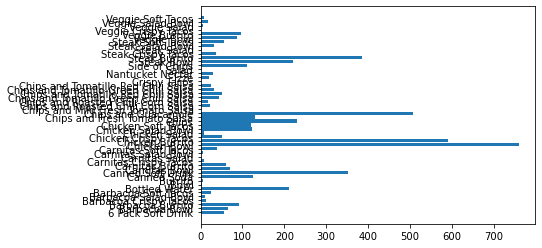

In [40]:
plt.barh(item_quantity.index, item_quantity)
plt.show()

In [60]:
# item_price 칼럼은 $ xx.xxx
# float의 형태로 변환
# $ 삭제
# 타입을 float으로 변경

# case1
chipo['item_price'].str.replace('$', '').astype(float)

# case2
chipo['item_price'].str.lstrip('$').astype(float)

# case3
chipo['item_price'].apply(lambda x : float(x.replace('$', '')))

# case4
def change(x):
    result = float(x.replace('$', ''))
    return result
chipo['item_price'] = chipo['item_price'].apply(change)

In [61]:
chipo.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [62]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [69]:
# 수량이 1개인 데이터를 출력
chipo_one_item = chipo[chipo['quantity'] == 1]
# chipo.query('quantity == 1')

In [74]:
# item_name을 기준으로 그룹화하고 item_price의 최솟값을 구하면 아이템당 가격을 추출 가능
price_per_item = chipo_one_item.groupby('item_name').min()

In [77]:
#  item당 가격이 큰 것부터 상위 10개를 출력
price_per_item.sort_values('item_price', ascending=False).head(10)
price_per_item.sort_values('item_price', ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [80]:
import numpy as np

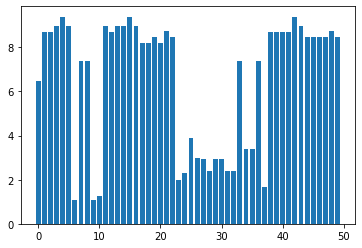

In [83]:
# 아이템 가격 분포 그래프 출력
# 바형 그래프
x = price_per_item.index
x_pos = np.arange(len(x))
y = price_per_item['item_price']

plt.bar(x_pos, y)
plt.show()

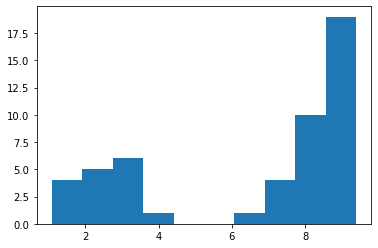

In [84]:
# 히스토그램 출력
plt.hist(y)
plt.show()

In [ ]:
# 'chicken bowl'을 2개 이상 주문한 고객들의 'chicken bowl' 메뉴의 총 주문 수량
chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']

In [92]:
chipo_chicken.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49


In [90]:
len(chipo_chicken)

726

In [94]:
# order_id를 기준으로 그룹화하여 주문수량 합계 출력
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']

In [95]:
len(chipo_chicken_ordersum)

615

5. 주문당 평균 계산 금액 출력
6. 각 아이템의 가격을 출력한 후에 가격 분포 그래프 / 가격 히스토그램 출력
7. 'Chicken Bowl'을 2개 이상 주문한 고객들의 'Chicken Bowl' 메뉴의 총 주문 수량 출력

In [97]:
# 726개 중 615 => 재주문한 경우가 111회

# 필터링해서 'Chicken Bowl'을 2개 이상 주문한 고객들 주문 출력
chipo_chicken_ordersum[chipo_chicken_ordersum >= 2] 

order_id
2       2
34      2
70      2
93      2
124     3
       ..
1767    2
1771    2
1786    5
1824    2
1825    3
Name: quantity, Length: 114, dtype: int64

In [100]:
# Chicken Bowl 2개 이상 주문한 고객, Chicken Bowl 메뉴의 총 주문 수량 출력
chipo_chicken_ordersum[chipo_chicken_ordersum >= 2].sum()

260